# ***First We Load Our Dataset For Image Identification***

In [1]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [2]:
! kaggle datasets download -d brsdincer/vehicle-detection-image-set

 88% 105M/119M [00:00<00:00, 125MB/s] 
100% 119M/119M [00:01<00:00, 119MB/s]


# ***Load Our Important Libraries For Trained Our Model***

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import k_means
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import data
import tensorflow as tf
from tensorflow import keras
import cv2
import os
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout
from keras.layers import Conv2D,MaxPooling2D
import zipfile
import torch
import torch.nn as nn
import librosa
from torch.optim import Adam


# ***Reduce The Zip File And Take Data From It***

In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/vehicle-detection-image-set.zip")
zip_ref.extractall("/content")
zip_ref.close()

# ***Train Data Directory***

In [11]:
train_data_dir = "/content/data"
test_data_dir = "/content/data"

# ***Plot Some Images Of Our Dataset So Identify Vehicle***

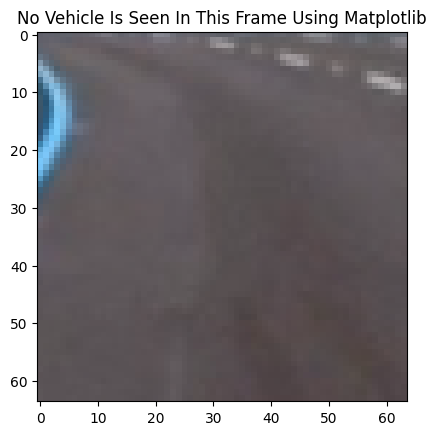

In [52]:
img = cv2.imread("/content/data/non-vehicles/extra1005.png")
plt.title("No Vehicle Is Seen In This Frame Using Matplotlib")
plt.imshow(img)


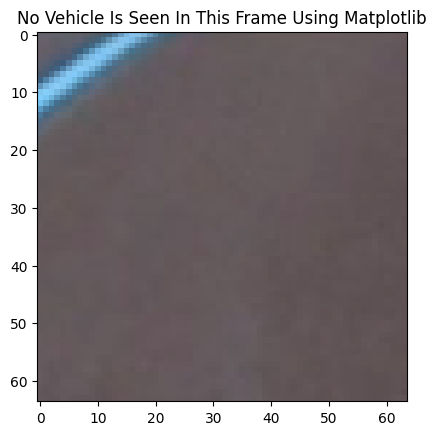

In [57]:
img = cv2.imread("/content/data/non-vehicles/extra1014.png")
plt.title("No Vehicle Is Seen In This Frame Using Matplotlib")
plt.imshow(img)


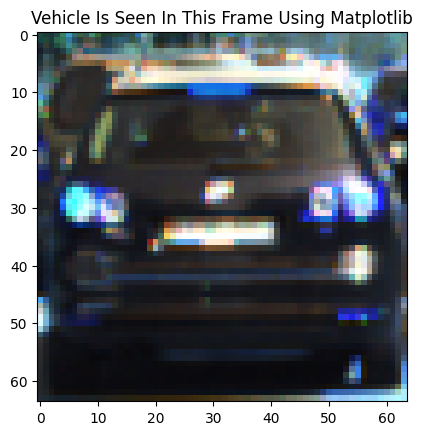

In [53]:
img = cv2.imread("/content/data/vehicles/1007.png")
plt.title("Vehicle Is Seen In This Frame Using Matplotlib")
plt.imshow(img)


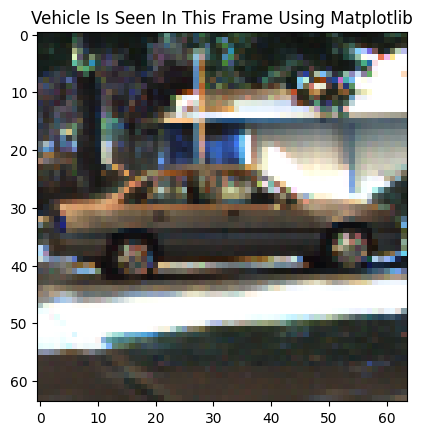

In [54]:
img = cv2.imread("/content/data/vehicles/1031.png")
plt.title("Vehicle Is Seen In This Frame Using Matplotlib")
plt.imshow(img)


# ***Divide Our Train Dataset In Train And Test Split***

In [7]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.40
)

In [29]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    color_mode= "grayscale",
    target_size=(48,48),
    batch_size = 64,
    class_mode = "categorical",
    subset = 'training'
)

validation_generator = datagen.flow_from_directory(
    test_data_dir,
    color_mode= "grayscale",
    target_size=(48,48),
    batch_size = 64,
    class_mode = "categorical",
    subset = 'validation'
)

Found 10657 images belonging to 2 classes.
Found 7103 images belonging to 2 classes.


# ***Class_Label Name For Our Image Identification***

In [30]:
class_label = ['non-vehicles','vehicles']

# ***Class Label Length***

In [31]:
len(class_label)

2

# ***Convert Images In Matrix Form Using Train Generator***

In [32]:
img,label = train_generator.__next__()

# ***Print Matrix Image***

In [33]:
print(img)

[[[[0.58431375]
   [0.6       ]
   [0.6156863 ]
   ...
   [0.5647059 ]
   [0.61960787]
   [0.6431373 ]]

  [[0.5764706 ]
   [0.5921569 ]
   [0.60784316]
   ...
   [0.5764706 ]
   [0.61960787]
   [0.6392157 ]]

  [[0.5764706 ]
   [0.5882353 ]
   [0.6       ]
   ...
   [0.57254905]
   [0.59607846]
   [0.6156863 ]]

  ...

  [[0.34901962]
   [0.34117648]
   [0.34509805]
   ...
   [0.5764706 ]
   [0.59607846]
   [0.59607846]]

  [[0.4039216 ]
   [0.39607847]
   [0.3921569 ]
   ...
   [0.5529412 ]
   [0.5019608 ]
   [0.4901961 ]]

  [[0.4156863 ]
   [0.40784317]
   [0.40000004]
   ...
   [0.54901963]
   [0.48235297]
   [0.4666667 ]]]


 [[[0.24313727]
   [0.29411766]
   [0.24705884]
   ...
   [0.24705884]
   [0.2627451 ]
   [0.42352945]]

  [[0.4666667 ]
   [0.45098042]
   [0.40000004]
   ...
   [0.4039216 ]
   [0.3529412 ]
   [0.43529415]]

  [[0.46274513]
   [0.43529415]
   [0.38431376]
   ...
   [0.43529415]
   [0.36862746]
   [0.427451  ]]

  ...

  [[0.03921569]
   [0.03529412]
   [0.0

# Model Creation For Trained Our Model

In [34]:
Dropout,
# Create a cnn model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(48,48,1)))
model.add(Dropout(0.1))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512,activation="relu"))

model.add(Dense(2,activation="relu"))

# ***Summary OF Our Model***

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 dropout_7 (Dropout)         (None, 46, 46, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 20, 20, 128)       73856     
                                                      

# ***Compilation Of Our Model For Training And Testing Decreasing Losses Using Categorical Cross Entropy***

In [36]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [37]:
train_path = "/content/data"

In [22]:
num_train_imgs = 0

for root,dirs,files in os.walk(train_path):
  num_train_imgs+=len(files)
  num_test_imgs = 0
print(num_train_imgs)

17760


# ***Trained Our Model And Run Epochs For Model Training***

In [38]:
history=model.fit(train_generator,steps_per_epoch=25,epochs=10
                  ,validation_data=validation_generator)

Epoch 1/10
25/25 [==============================] - 63s 2s/step - loss: 0.9982 - accuracy: 0.5325 - val_loss: 0.6713 - val_accuracy: 0.6347
Epoch 2/10
25/25 [==============================] - 60s 2s/step - loss: 0.6571 - accuracy: 0.6644 - val_loss: 0.6558 - val_accuracy: 0.6137
Epoch 3/10
25/25 [==============================] - 70s 3s/step - loss: 0.6414 - accuracy: 0.6812 - val_loss: 0.6404 - val_accuracy: 0.6437
Epoch 4/10
25/25 [==============================] - 61s 3s/step - loss: 0.6112 - accuracy: 0.7298 - val_loss: 0.7261 - val_accuracy: 0.6421
Epoch 5/10
25/25 [==============================] - 70s 3s/step - loss: 0.5899 - accuracy: 0.7638 - val_loss: 0.5462 - val_accuracy: 0.7657
Epoch 6/10
25/25 [==============================] - 58s 2s/step - loss: 0.4387 - accuracy: 0.8292 - val_loss: 0.6334 - val_accuracy: 0.6516
Epoch 7/10
25/25 [==============================] - 70s 3s/step - loss: 0.7129 - accuracy: 0.5226 - val_loss: 0.6812 - val_accuracy: 0.6165
Epoch 8/10
25/25 [==

# ***Lossses And Accuracy Plot***

<Axes: >

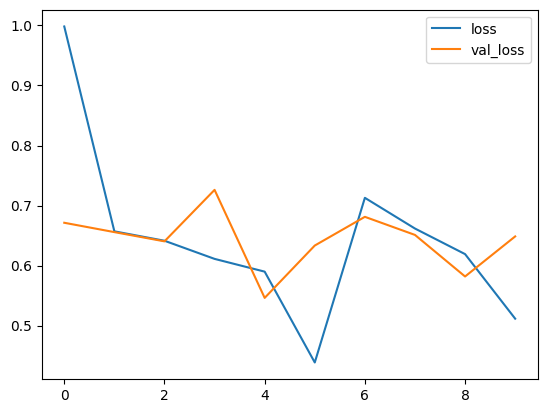

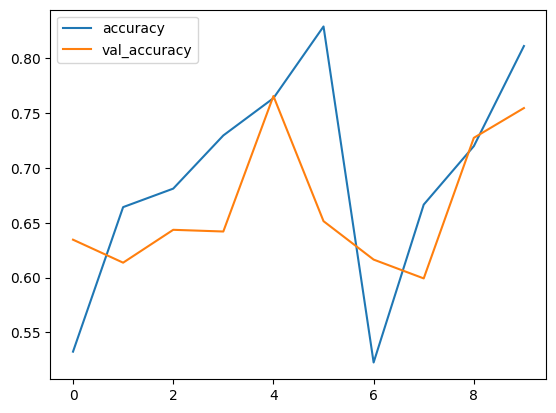

In [39]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()

# ***Testing Of Our Deep Learning Model***

1/1 [==============================] - 0s 29ms/step
1
Please Maintain Your Speed Vechicle Are Seen In Frame


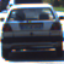

In [42]:
#TEST OUR DATASET

import numpy as np
import pandas as pd
import os
import cv2
from keras.models import load_model
from google.colab.patches import cv2_imshow
#import winsound


labels_dict = {0:'non-vehicles',1:'vehicles'}

frame = cv2.imread("/content/data/vehicles/1103.png")

gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)


#sub_face_img = gray[y:y+h, x:x+w]
resized = cv2.resize(gray,(48,48))
normalize = resized/255.0
reshaped = np.reshape(normalize,(1,48,48,1))
result = model.predict(reshaped)
label = np.argmax(result,axis=1)[0]
print(label)
if (label==0):
  print("No Vehicles Seen In Car Frame You Continue With Same Speed")
elif (label==1):
  print("Please Maintain Your Speed Vechicle Are Seen In Frame")
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 45ms/step
0
No Vehicles Seen In Car Frame You Continue With Same Speed


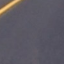

In [44]:
#TEST OUR DATASET

import numpy as np
import pandas as pd
import os
import cv2
from keras.models import load_model
from google.colab.patches import cv2_imshow
#import winsound


labels_dict = {0:'non-vehicles',1:'vehicles'}

frame = cv2.imread("/content/data/non-vehicles/extra1014.png")

gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)


#sub_face_img = gray[y:y+h, x:x+w]
resized = cv2.resize(gray,(48,48))
normalize = resized/255.0
reshaped = np.reshape(normalize,(1,48,48,1))
result = model.predict(reshaped)
label = np.argmax(result,axis=1)[0]
print(label)
if (label==0):
  print("No Vehicles Seen In Car Frame You Continue With Same Speed")
elif (label==1):
  print("Please Maintain Your Speed Vechicle Are Seen In Frame")
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 27ms/step
1
Please Maintain Your Speed Vechicle Are Seen In Frame


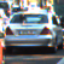

In [45]:
#TEST OUR DATASET

import numpy as np
import pandas as pd
import os
import cv2
from keras.models import load_model
from google.colab.patches import cv2_imshow
#import winsound


labels_dict = {0:'non-vehicles',1:'vehicles'}

frame = cv2.imread("/content/data/vehicles/1013.png")

gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)


#sub_face_img = gray[y:y+h, x:x+w]
resized = cv2.resize(gray,(48,48))
normalize = resized/255.0
reshaped = np.reshape(normalize,(1,48,48,1))
result = model.predict(reshaped)
label = np.argmax(result,axis=1)[0]
print(label)
if (label==0):
  print("No Vehicles Seen In Car Frame You Continue With Same Speed")
elif (label==1):
  print("Please Maintain Your Speed Vechicle Are Seen In Frame")
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 58ms/step
0
No Vehicles Seen In Car Frame You Continue With Same Speed


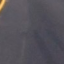

In [46]:
#TEST OUR DATASET

import numpy as np
import pandas as pd
import os
import cv2
from keras.models import load_model
from google.colab.patches import cv2_imshow
#import winsound


labels_dict = {0:'non-vehicles',1:'vehicles'}

frame = cv2.imread("/content/data/non-vehicles/extra1009.png")

gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)


#sub_face_img = gray[y:y+h, x:x+w]
resized = cv2.resize(gray,(48,48))
normalize = resized/255.0
reshaped = np.reshape(normalize,(1,48,48,1))
result = model.predict(reshaped)
label = np.argmax(result,axis=1)[0]
print(label)
if (label==0):
  print("No Vehicles Seen In Car Frame You Continue With Same Speed")
elif (label==1):
  print("Please Maintain Your Speed Vechicle Are Seen In Frame")
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()